In [1]:
import pandas as pd
import patsy as ps
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

listing = pd.read_csv('listings.csv')


In [2]:
listing.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
df = listing[['host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood','host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price',  'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
        'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']]

In [11]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print(num_rows,num_cols)

3818 51


In [12]:
df = df.dropna(subset = ['price'], how='any')
df["price"]=df.price.str.replace('$','').str.replace(',','').astype(float)
df["security_deposit"]=df.security_deposit.str.replace('$','').str.replace(',','').astype(float)
df["cleaning_fee"]=df.cleaning_fee.str.replace('$','').str.replace(',','').astype(float)
df["host_acceptance_rate"]=df.host_acceptance_rate.str.replace('%','').str.replace(',','').astype(float)
df["extra_people"]=df.extra_people.str.replace('$','').str.replace(',','').astype(float)
df['host_acceptance_rate'].fillna(df.host_acceptance_rate.mean(), inplace=True)
df['host_neighbourhood'].fillna("unknown", inplace=True)
df['square_feet'].fillna(df.square_feet.mean(), inplace=True)
df['security_deposit'].fillna(df.security_deposit.mean(), inplace=True)
df['cleaning_fee'].fillna(df.cleaning_fee.mean(), inplace=True)
df['review_scores_rating'].fillna(df.review_scores_rating.mean(), inplace=True)
df['review_scores_accuracy'].fillna(df.review_scores_accuracy.mean(), inplace=True)
df['review_scores_cleanliness'].fillna(df.review_scores_cleanliness.mean(), inplace=True)
df['review_scores_checkin'].fillna(df.review_scores_checkin.mean(), inplace=True)
df['review_scores_communication'].fillna(df.review_scores_communication.mean(), inplace=True)
df['review_scores_location'].fillna(df.review_scores_location.mean(), inplace=True)
df['review_scores_value'].fillna(df.review_scores_value.mean(), inplace=True)
df['review_scores_value'].fillna(df.review_scores_value.mean(), inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [13]:
y, X = ps.dmatrices("price ~ 1 + C(property_type)+ C(room_type)+ C(bed_type)+ C(zipcode)+"
                    "  accommodates + bathrooms + bedrooms + beds + bed_type +
                    " guests_included + extra_people ",df, return_type='dataframe')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=.30, random_state=42)


In [36]:
lm_model = LinearRegression(normalize=False)  # Instantiate
lm_model.fit(X_train.values, y_train.values)  # Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Predict and score the model
y_test_preds = lm_model.predict(X_test.values)

#print(y_test_preds,y_test.values) #these are the model predictions, or y_hat for the test Xs

print(len(y_test_preds))
print(len(y_test.values))

1137
1137


In [38]:
# Rsquared and y_test
rsquared_score = r2_score(y_test.values, y_test_preds)
length_y_test = len(y_test)
print(rsquared_score)

0.6506343347372665


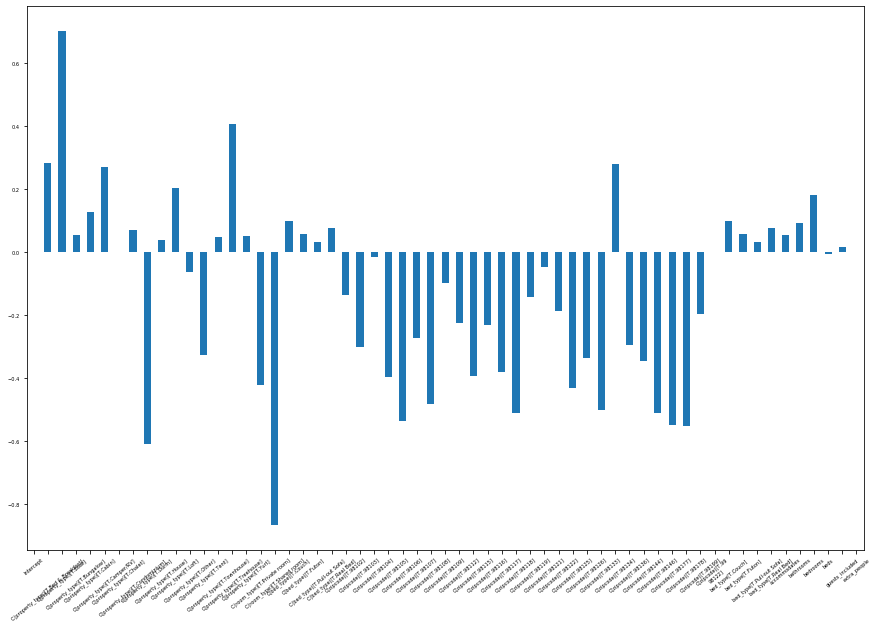

In [51]:
coeff_df = pd.Series(lm_model.coef_[0], index=X.columns)
coeff_df.plot.bar(rot=40,figsize=[15,10],fontsize=5)

